In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dict_df = pd.read_csv('data-dictionary.csv')

In [5]:
dict_df.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [6]:
df.shape

(167, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
#sum of all the null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
#no of unique countries
df['country'].nunique()

167

in unsupervised learning we don't need the string column which is country so we are going to drop it

In [12]:
data = df.drop(['country'], axis = 1)

In [13]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


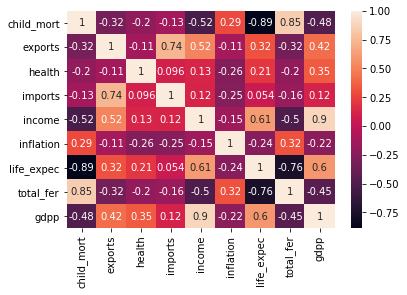

In [14]:
#correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True)

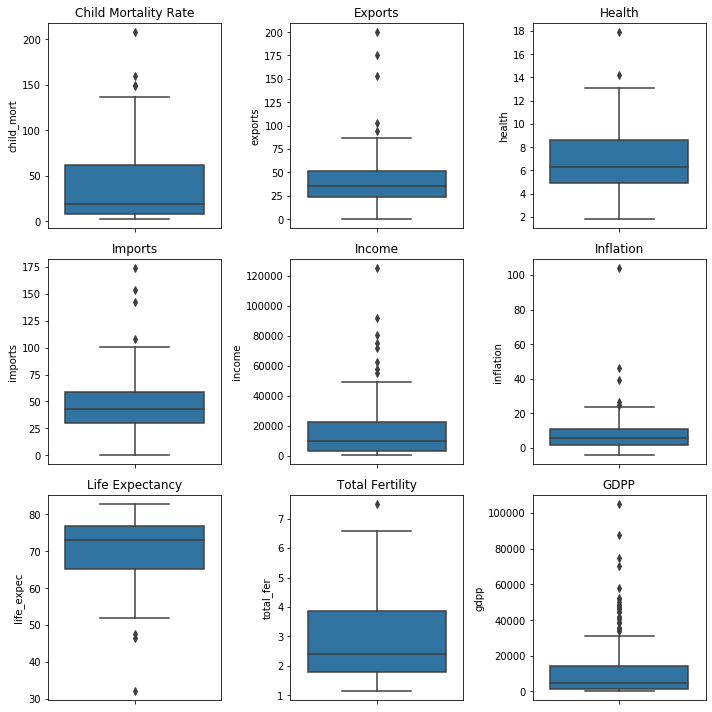

In [15]:
#box plot
fig, ax = plt.subplots(3,3, figsize = (10,10))
sns.boxplot(y=data.child_mort, ax = ax[0,0])
ax[0,0].set_title('Child Mortality Rate')
sns.boxplot(y=data.exports, ax = ax[0,1])
ax[0,1].set_title('Exports')
sns.boxplot(y=data.health, ax = ax[0,2])
ax[0,2].set_title('Health')
sns.boxplot(y=data.imports, ax = ax[1,0])
ax[1,0].set_title('Imports')
sns.boxplot(y=data.income, ax = ax[1,1])
ax[1,1].set_title('Income')
sns.boxplot(y=data.inflation, ax = ax[1,2])
ax[1,2].set_title('Inflation')
sns.boxplot(y=data.life_expec, ax = ax[2,0])
ax[2,0].set_title('Life Expectancy')
sns.boxplot(y=data.total_fer, ax = ax[2,1])
ax[2,1].set_title('Total Fertility')
sns.boxplot(y=data.gdpp, ax = ax[2,2])
ax[2,2].set_title('GDPP')
plt.tight_layout()

From above Box Plots we can say that there are many outliers especially in GDPP, Income and Exports.
We cant remove the outliers as the data is very less which is only 167 rows

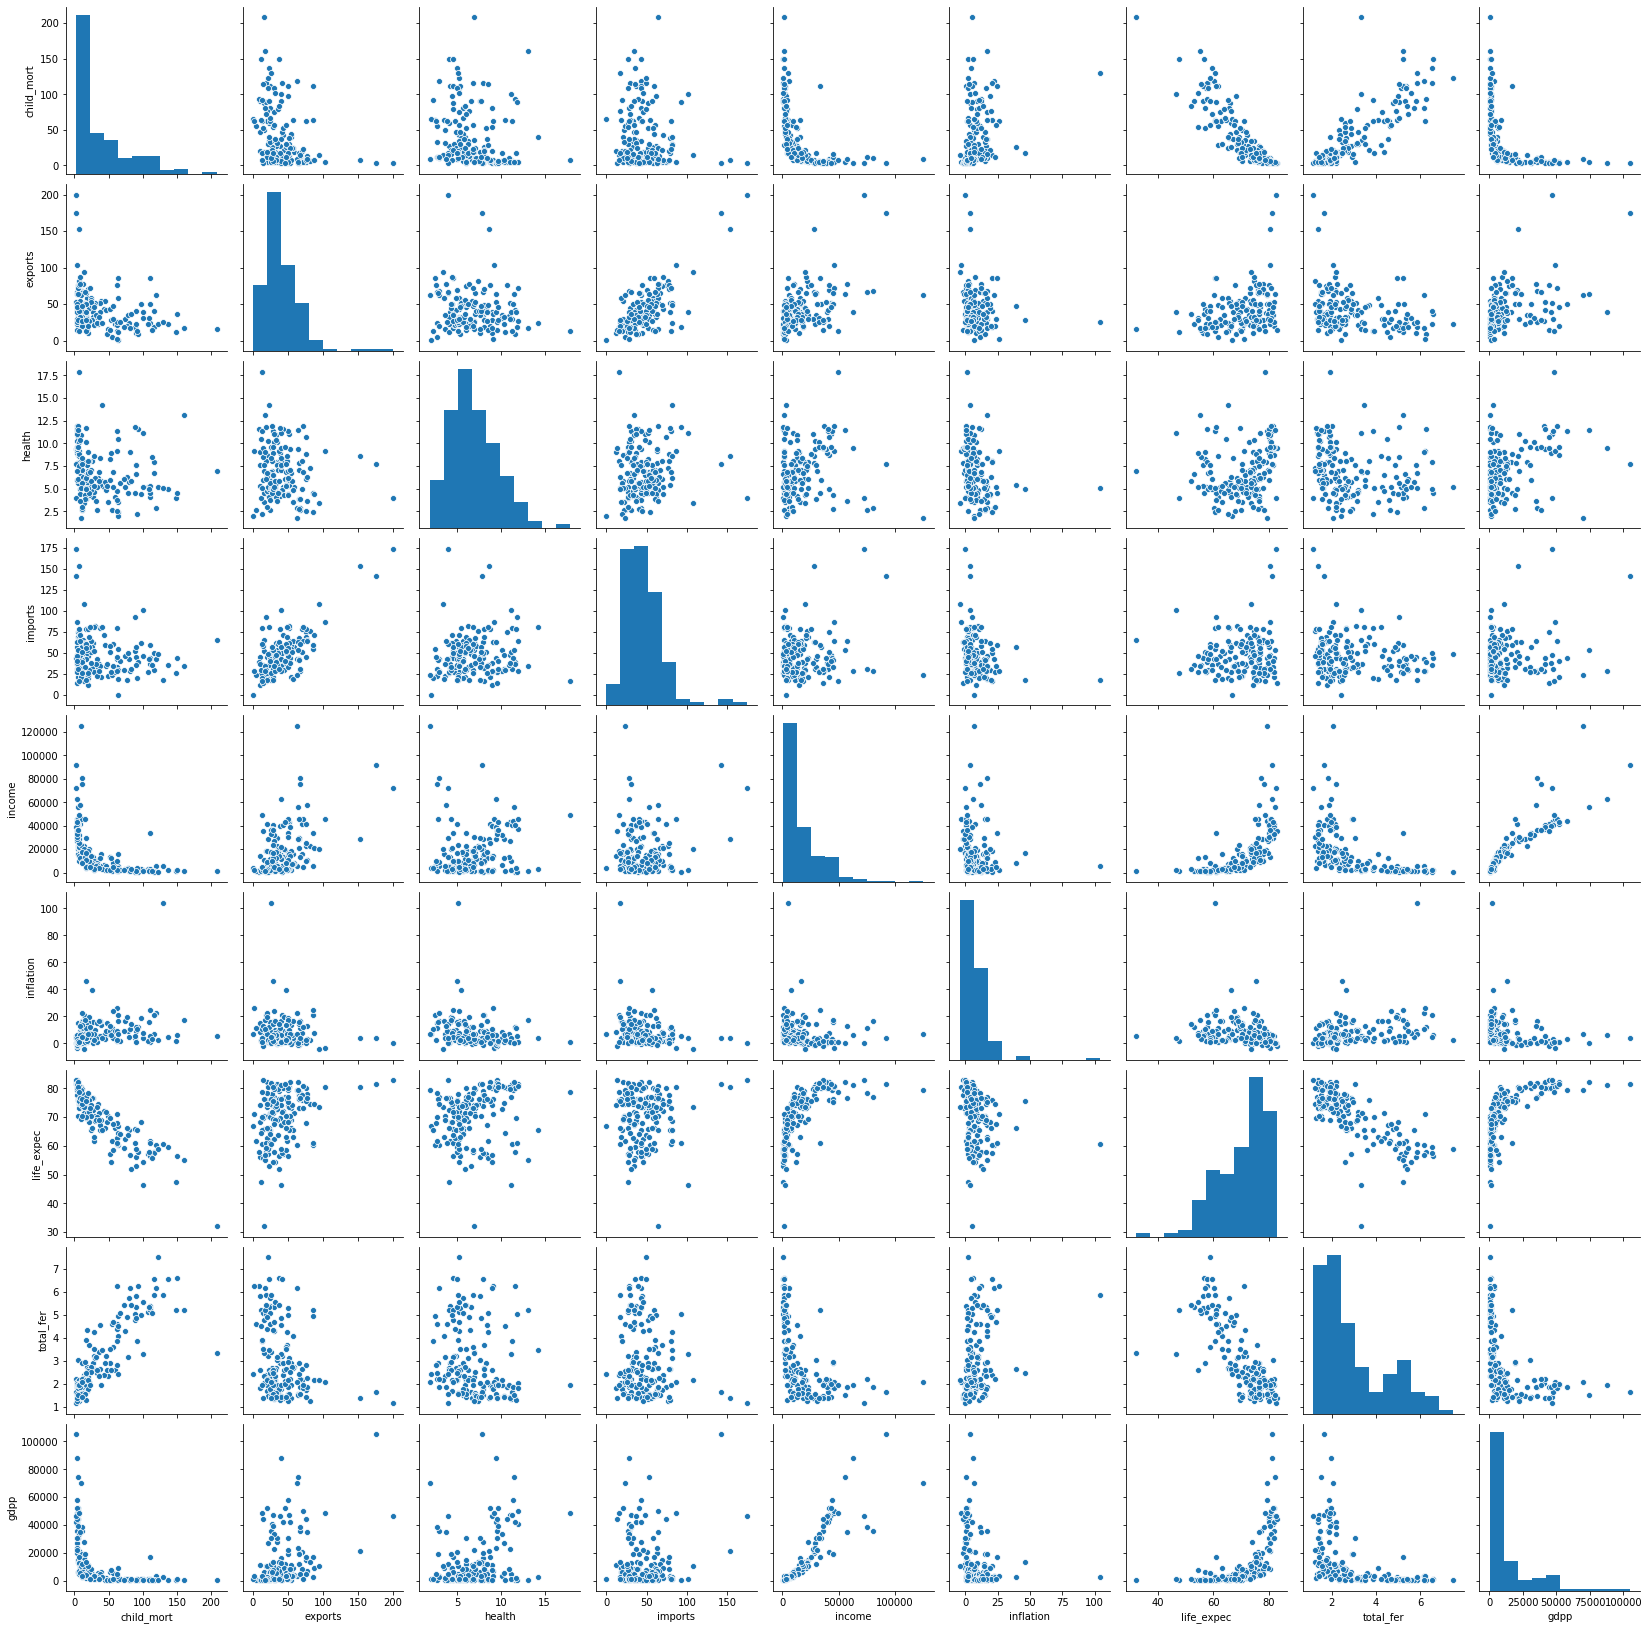

In [16]:
sns.pairplot(data)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)


In [18]:
scaled_df = pd.DataFrame(scaled, columns = data.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# K-Means Clustering

Using the elbow method to find the optimal number of clusters

Text(0, 0.5, 'WCSS')

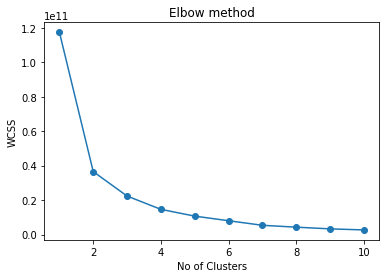

In [19]:
from sklearn.cluster import KMeans
wcss = [] # wcss stands for within clusters sum of squares
R = range(1,11)
for i in R:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(R, wcss, marker = 'o')
plt.title('Elbow method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

From the above figure we can say that the optimal number of clusters is 3

In [20]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', random_state = 42)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [21]:
pd.Series(kmeans.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

In [22]:
from sklearn import metrics
metrics.silhouette_score(scaled_df, kmeans.labels_)

0.28329575683463126

# Prediction

In [23]:
cluster_labels = kmeans.fit_predict(scaled_df)

In [24]:
clusters = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['Kmeans Clusters'] = clusters
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


# Visualization of Clusters

Text(0, 0.5, 'gdpp')

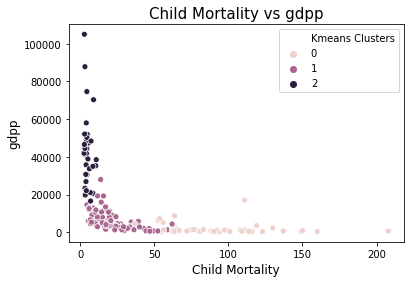

In [25]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='Kmeans Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)

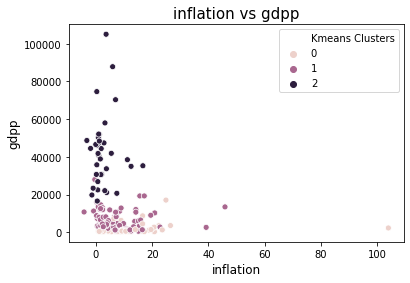

In [26]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'],kmeans_df['gdpp'],hue='Kmeans Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that<br>
1. Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a **under-developing country**
2. Country having low child-mortality, high gdpp and high infaltion is the **developed country**


**So here we conclude that**<br>
0 = **under-developing country**<br>
1 = **developing country**<br>
2 = **developed country**<br>

In [28]:
under_developing = kmeans_df[kmeans_df['Kmeans Clusters'] == 0]['country']
developing = kmeans_df[kmeans_df['Kmeans Clusters'] == 1]['country']
developed = kmeans_df[kmeans_df['Kmeans Clusters'] == 2]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 47
Number of developing countries 84
Number of under-developing countries 36
